## Lasttests von Machine Learning Modellen zur Qualitätssicherung
Dieses Notebook ist Teil von <a href='https://datenverknoten.de/mlops/lasttests-von-machine-learning-modellen-zur-qualitatssicherung/' target='_blank'>einem Artikel</a> auf www.datenverknoten.de.
<br>Quelle des verwendeten Datensatzes: https://www.kaggle.com/lirilkumaramal/heart-stroke

In [1]:
import pandas as pd
import seaborn as sns

Mit JMeter wurde ein Lasttest durchgeführt. Die Ergebnisse der Anfragen sind in einer CSV Datei gespeichert, die zunächst geladen wird.

In [2]:
test_results = pd.read_csv('export.csv')

Um den Inhalt der Daten zu verstehen, werden die ersten Zeilen der Tabelle ausgegeben.

In [3]:
test_results.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1617400249429,10,HTTP Request,200,OK,Alle 1-2,text,True,NaN,156,400,3,3,http://127.0.0.1:5005/invocations,10,0,1
1,1617400249413,22,HTTP Request,200,OK,Alle 1-1,text,True,NaN,156,400,2,2,http://127.0.0.1:5005/invocations,21,0,12
2,1617400249444,5,HTTP Request,200,OK,Alle 1-2,text,True,NaN,156,400,3,3,http://127.0.0.1:5005/invocations,5,0,1
3,1617400249444,6,HTTP Request,200,OK,Alle 1-1,text,True,NaN,156,400,3,3,http://127.0.0.1:5005/invocations,6,0,2
4,1617400249449,4,HTTP Request,200,OK,Alle 1-3,text,True,NaN,156,400,3,3,http://127.0.0.1:5005/invocations,4,0,1


Zunächst soll untersucht werden, wie viele der 6250 Anfragen nicht erfolgreich waren.

In [4]:
test_results[['responseMessage','responseCode']].groupby('responseMessage').count()

,responseCode
responseMessage,
Non HTTP response message: Broken pipe (Write failed),2
Non HTTP response message: Connection reset,2
OK,6246


Es wird ein Histogram erstellt, in welchem sich die Verteilung der elapsed miliseconds sehen lässt.

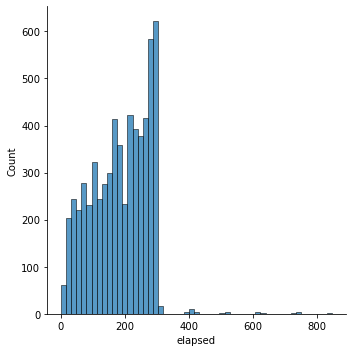

In [7]:
sns.displot(test_results, x='elapsed')

In einem Scatterplot wird die elapsed milliseconds Zeit gegen den Zeitstempel aufgetragen.

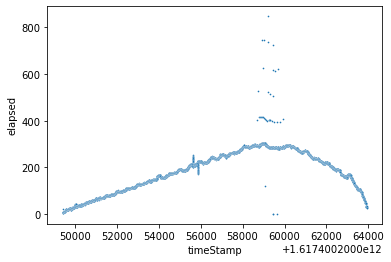

In [13]:
sns_plot = sns.scatterplot(data=test_results, x="timeStamp", y="elapsed",s=3)
sns_plot.get_figure().savefig('mlops_3_xy.png')